### ➔ Motivation 

In this project I tried to solve task of detecting faces of rubiks cube and solving it with nn. So there is several steps of solving this task.
1) I got the image of scrambled rubiks cube. 
2) detect position of it's stikers  applying mask 
3) parsing results in to form of formula string for the next solving
4) than I used package pycube and some code to make generator for dataset
5) build and train network for solving rubiks cube
6) convert formula string to the input data to trained nn 
7) try to solve rubiks cube with nn. 


### ➔ Introduction

I've researched this theme a bit and we have different aproaches to get the result. 

If it comes to detecting sides and stikers on the rubic's cube.

We can use opencv lib and kmeans if we have direct images of the cube sides.

Or use cnn to detect only three sides of rubiks cube than count mathematicaly other three sides. 

For solving rubiks cube we can use different ways. But generaly I saw two approaches. First it to scramble the cube,

remember the stpes of scramble and allow nn to gues the steps which where done to scramble it and disscramble backwards. 

It most efficient way to solve the cube. But not the fastest. 

And second one is to learn nn how people solve it with formulas and movements. 

But for this we need huge dataset and anotations where discribed a lot of situations and formulas that used to solve the cube. 

### ➔ Description 

After analysing the main approaches and time that I have for this mini project

I understood that better way to accomplish some result is to use approach

to detect faces and stikers by opencv parse this data to nn and try to train it for solving rubiks cube in backwards.

Cause I dont need dataset and can simply generate it for nn to train. But it could lead to lower accuracy.


#### Technical info about project. 

there several modules. 
- detection - reponsible for detecting faces and stickers on the images
- utils - general methods for cube operations, generating data and parsing formula to input. 
- main - file that invokes detecting and model that solves the cube. Need to have trained model with auto.weights.h5 file in the directory. 
- model - general architecture of the nn 
- model_train - file responsible for training model and generating auto.weight.h5 file. 
- model_solve - file wich is responsible for solving cube with trained model. 

Separately there is grid_mask img that represents mask for detecting stikers on the face of cube. And imgs folder where photos with cube stored. 

### ➔ Demo 

Firstly I load images of cube sides. 

(-0.5, 767.5, 767.5, -0.5)

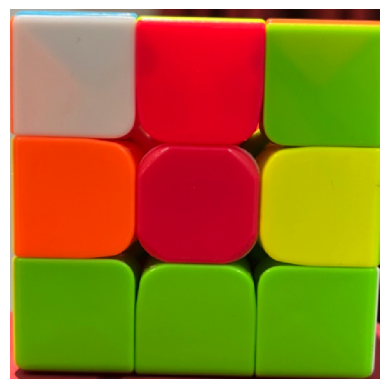

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('imgs/B.png')
plt.imshow(image)
plt.axis('off')


Than applying this mask to our image to detect stikers on the cube for all sides

(-0.5, 767.5, 767.5, -0.5)

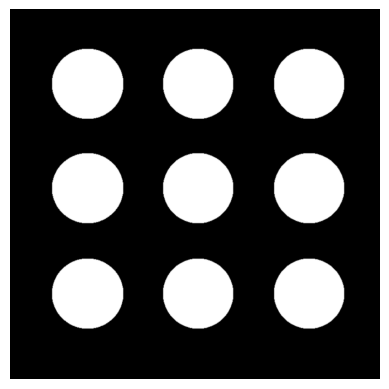

In [5]:
image = mpimg.imread('grid_mask.png')
plt.imshow(image)
plt.axis('off')

(-0.5, 497.5, 327.5, -0.5)

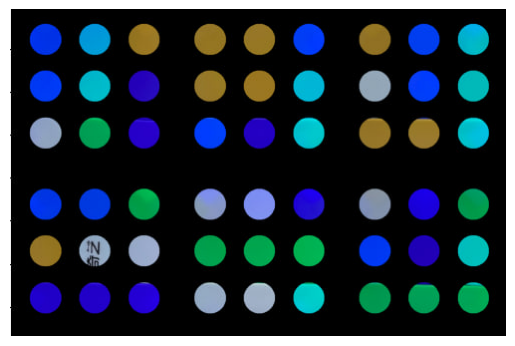

In [8]:
image = mpimg.imread('imgs/stickers.jpg')
plt.imshow(image)
plt.axis('off')

than we applying kmeans to detect 7 groups of colors 6 on the sides and 7th black it's not accurate so we need to make two runs in first run we see that some colours detected corectly. When I achive that 9 stickers are the same colours found I can substract them and 1 cluster from the all stickers and repeat the process so I got:

(-0.5, 568.5, 405.5, -0.5)

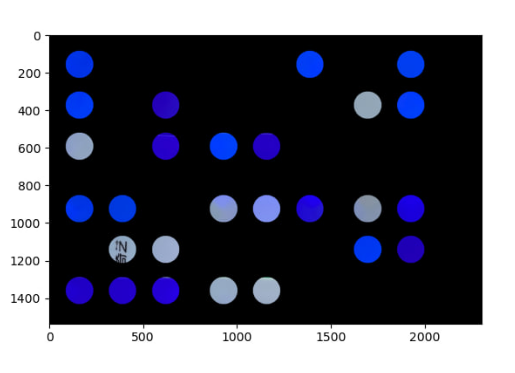

In [9]:
image = mpimg.imread('imgs/stickers-2.jpg')
plt.imshow(image)
plt.axis('off')

So that lead me to the classification of these stickers


(-0.5, 560.5, 346.5, -0.5)

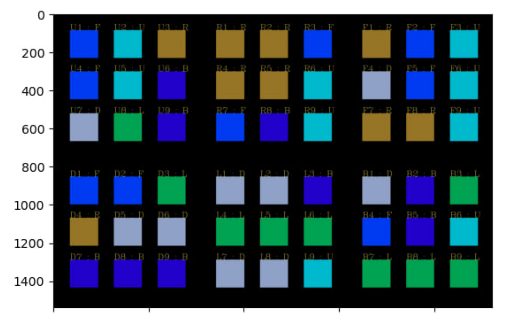

In [11]:
image = mpimg.imread('imgs/classifiacation.jpg')
plt.imshow(image)
plt.axis('off')

so that we know that each center not movable and we can make list of colours and loop over it to get the formula wich represents a state of cube 
formula: FURFUBDLBRRFRRUFBURFUDFURRUFFLRDDBBBDDBLLLDDUDBLFBULLL


than I used pycuber lib and found some code to generate scrables for our network and made training process for it. After it we saved weights for this in separate file. 

after that we pass our formula to the pycuber parser wich is makes a cube object with current state.


(-0.5, 376.5, 191.5, -0.5)

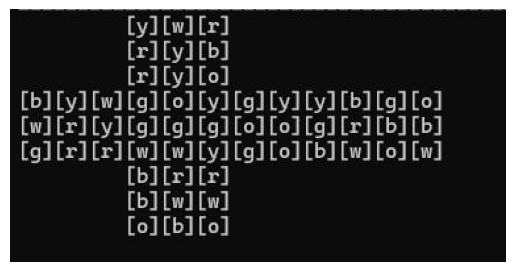

In [12]:
image = mpimg.imread('imgs/scrabled.jpg')
plt.imshow(image)
plt.axis('off')

And we pass the cube as input for our nn to solve it. After some time. It brings us result. 


(-0.5, 407.5, 177.5, -0.5)

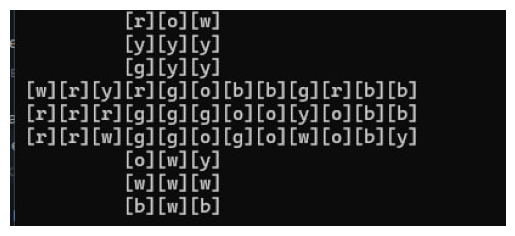

In [13]:
image = mpimg.imread('imgs/solved.jpg')
plt.imshow(image)
plt.axis('off')

We can see that it almost sorted all segments. But there still inaccuracy in the method so it not finished it properly. But if we wil make some tweaks to the nn and paramters. And if I spend more time for trainings in the future I think it could lead to proper result. 

### ➔ Results

Total accuracy is around 0.6 of predicted descision. So It not enough to solve rubiks cube fast we can adjust attmepts

 in the model_solve file so it will have more time to solve it. 
 
 Or we can reopeat training process with tweaks and add more epochs for the learning process to achieve higher level of accuracy.

### ➔ Conclusions

As we can see solving of rubiks cube are not ideal and it has progress but can't solve some complex scrablings. 
there several reasons of it. 

- lack of my expirenece in building nn 
- the comlexity of nn is not enough. We can still add some layers and change the architecture to achive more efficient result
- also we can adjust more epochs and steps per epoch to achive more effective results. In works that I've researched they trained with 10k
epochs and it gave accuracy around 90% but it takes way more time to train nn 

Future works:
1. we can change detection
    1. make fixed sides. We know that 6 sides in the center has no movable sticker. In current project I used files with name of each side. So I did it manualy. But we can load six img. And detect sides by code and we don't need to name it according each side. It prevent us from mistaken naming of files.
    2. make detection from video in real time. Using mask and just taking frame from video for collecting images. 
    3. also we can make detection by cnn as I described before.  
2. change the solving algorythm
    1. as I mentioned before there two aproaches of solving rubiks cube. Try to guess how it was scrabled and make all movements backwards. It's most effective but not the fastest.
    and try to apply formulas that generates general state of the cube. That's why we can solve it fast. 
3. add some visualisations
    1. we can make app/website with the visualion of solving cube by nn. 
    2. also in this app we can download our scramble and give it to nn to slove it. 